# Exploratory Data Analysis

## Load the Data

In [1]:
# Import necessary libraries
%matplotlib inline
import numpy as numpy
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from helpers import *

%load_ext autoreload
%autoreload 2

In [2]:
# Load the Data
data_path = "data/dataset/"
x_train, x_test, y_train, train_ids, test_ids = load_csv_data(data_path ,sub_sample=False)

## Data Overview

In [3]:
# View shape of the dataset
x_train.shape, x_test.shape, y_train.shape, train_ids.shape, test_ids.shape

((328135, 321), (109379, 321), (328135,), (328135,), (109379,))

- There are 321 features.
- `x_train` contains the training data and it has 328 135 data entries (before cleaning).
- `x_test` contains the test data and it has 109 379 data entires (before cleaning).
- The `y` vector corresponds to the true values of the output (the variable we wish to predict). The output describes whether a person is diagnosed with MICHD or not. It is binary, -1 or +1, where -1 means no MICHD and +1 means MICHD. There are 328 135 data points (before cleaning).
- `train_ids` and `test_ids` are numpy arrays. Their values correspond to the ids of the data entries of train data and test data, respectively. Therefore, the length of `train_ids` and `test_ids` correspond to the number of data entries for both train and test data, respectively.

In [4]:
# View the few first and last rows of the dataset
print(x_train[:5])  # First 5 elements

[[5.3000000e+01 1.1000000e+01 1.1162015e+07 ...           nan
            nan 2.0000000e+00]
 [3.3000000e+01 1.2000000e+01 1.2152015e+07 ...           nan
            nan           nan]
 [2.0000000e+01 1.0000000e+01 1.0202015e+07 ... 1.0000000e+00
  2.0000000e+00 2.0000000e+00]
 [4.2000000e+01 6.0000000e+00 6.1820150e+06 ... 2.0000000e+00
  2.0000000e+00 2.0000000e+00]
 [2.4000000e+01 1.1000000e+01 1.1062015e+07 ... 9.0000000e+00
  9.0000000e+00 2.0000000e+00]]


In [5]:
print(x_train[-5:])  # Last 5 elements

[[4.9000000e+01 7.0000000e+00 1.1232015e+07 ...           nan
            nan 2.0000000e+00]
 [5.1000000e+01 5.0000000e+00 6.0820150e+06 ...           nan
            nan 1.0000000e+00]
 [3.9000000e+01 1.0000000e+01 1.0202015e+07 ... 2.0000000e+00
  2.0000000e+00 2.0000000e+00]
 [3.3000000e+01 1.2000000e+01 1.2302015e+07 ...           nan
            nan 2.0000000e+00]
 [3.2000000e+01 9.0000000e+00 9.1220150e+06 ...           nan
            nan 2.0000000e+00]]


In [6]:
# Getting rid of useless features

In [7]:
# Note which features are categorical/continuous

## Getting Rid of Useless Features

To figure out which features are unimportant, we take a look at the column names of the dataset.

After taking a closer look at the features, we decide to remove the columns as done below. They were removed for either of these reasons:
- The columns were not relevant to the goal of our project (e.g. State, Income, etc.)
- The columns represented questions about a specific subject that were later regrouped into a single feature (e.g. for Cholesterol, many questions were asked to the participants. One final feature summarized the findings. We only keep this final feature.)
- The columns had too many null values, becoming irrelevant.

In [7]:
x_train_new = x_train.copy()
columns_to_remove = range(50)  # Indices of columns to remove
x_train_new = np.delete(x_train_new, columns_to_remove, axis=1)

In [8]:
columns_to_remove = range(1, 14)  # Indices of columns to remove
x_train_new = np.delete(x_train_new, columns_to_remove, axis=1)

In [9]:
columns_to_remove = range(2, 44)  # Indices of columns to remove
x_train_new = np.delete(x_train_new, columns_to_remove, axis=1)

In [10]:
columns_to_remove = range(13, 37)  # Indices of columns to remove
x_train_new = np.delete(x_train_new, columns_to_remove, axis=1)

In [11]:
columns_to_remove = range(16, 37)  # Indices of columns to remove
x_train_new = np.delete(x_train_new, columns_to_remove, axis=1)

In [12]:
columns_to_remove = range(42, 56)  # Indices of columns to remove
x_train_new = np.delete(x_train_new, columns_to_remove, axis=1)

In [13]:
columns_to_remove = range(52, 66)  # Indices of columns to remove
x_train_new = np.delete(x_train_new, columns_to_remove, axis=1)

In [14]:
columns_to_remove = [78, 79, 80]  # Indices of columns to remove
x_train_new = np.delete(x_train_new, columns_to_remove, axis=1)

In [15]:
x_train_new = np.delete(x_train_new, 72, axis=1) # remove height in inches to only keep height in meters

In [16]:
# Get rid of columns that have too many null values

x_train_clean = x_train_new.copy()
max_nan_threshold = 50000 # specify the threshold for the maximum allowed NaN values in a column
nan_counts =  np.isnan(x_train_new).sum(axis=0) #count the number of NaN values in each column
columns_to_keep = nan_counts <= max_nan_threshold # Identify columns to keep (those that have NaN counts below the threshold)
x_train_clean = x_train_clean[:, columns_to_keep] # Remove columns with too many NaN values

In [17]:
x_train_clean.shape

(328135, 70)

This leaves us with 70 features. Let's ignore take a closer look at the features left. 

In [18]:
np.isnan(x_train_clean).sum(axis=0)

array([    0,     0,     0,     0,     0, 43801,     0,     0,     0,
        1883,     0,     0,     0,     0,     0,     0,  5438,     0,
           0,     0,     0, 11368, 23006, 27073, 27073,     0,     0,
           0,     0,     0,     0,     0,     0, 28366, 26927, 29382,
       27893, 28958, 30593,     0,     0,     0,     0, 32115, 37605,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
       32496,     0,     0,     0,     0,     0,     0,     0,     0,
           0,  1883,  1883,  1883,     0,     0, 32080])

Below, we specify the index of the column, its name, the number of NaNs it contains, and the type of feature. If not specified, there are no NaNs.
- 2: health coverage. Type of health coverage, if it exists. **(Not relevant to this problem, can be removed)**
- 4: Cholesterol Check. How long it has been since last cholesterol check. **(Not relevant to this problem, can be removed)**
- 5,6: Asthma. Adults who have been told they formerly or currently have asthma.  **(Not relevant because the information is summarized in another variable)**
- 11,12,13,14,15: Race **(Not relevant because the information is summarized in another variable)**
- 28,29,30,31: drinking categories. **(Not relevant because the information is summarized in another variable)**
- 69: Tested for HIV. Measures whether the participant has been tested for HIV, but doesn't give information on whether they have been diagnoses. **(Not relevant to this problem, can be removed)**

In [19]:
x_train_final = x_train_clean.copy()
columns_to_remove = [2, 4, 7, 8, 11, 12, 13, 14, 15, 28, 29, 30, 31, 69] # Indices of columns to remove
x_train_final = np.delete(x_train_final, columns_to_remove, axis=1)

x_train_final.shape

(328135, 56)

Below, we specify the index of the column, its name, and we describe what it measures.
- 0: sex. Categorical: 1 for male, 2 for female.
- 1: health status. Categorical: 1 for good or better health, 2 for fair or poor health. 
- 2: Blood pressure levels. Categorical: 1 for low blood pressure, 2 for high blood pressure.
- 3: level of cholesterol, 43 801 NaNs. Categorical: 1 for low cholesterol, 2 for high cholesterol.
- 4: CHD or MI. Categorical: 1 for reported having MI or CHD, 2 if not.
- 5: asthma status, 1883 NaNs. Categorical: 1 current asthma, 2 former asthma, 3 no asthma.
- 6: Arthritis. Categorical: 1 diagnosed for arthiritis, 2 if not.
- 7: race groups, 5438 NaNs. Categorical: 1 White - Non-Hispanic, 2 Black - Non-Hispanic, 3 Hispanic, 4 Other race only - Non-hispanic, 5 Multiracial, Non-Hispanic.
- 8,9,10,11: Age categories. Different categorizations of Age. We keep them all to choose later.
- 12: height in meters, 11 368 NaNs.
- 13,14,15: weight in kg, BMI and 4 categories of BMI. They all have around 25 000 NaNs. We keep them all to choose later.
- 16: BMI categories. We keep them all to choose later.
- 17,18: smoke categories. We keep them both to choose later.
- 19: Heavy drinkers. Categorical: 1 if not heavy drinker, 2 if heavy drinker.
- 20 -> 25: fruits and vegetable consumption information, all have aroung 30 000 NaNs.
- 26,27,28,29: Same
- 30, 31: Same, all have around 30 000 NaNs.
- 32 -> 40: Exercise information
- 41: Exercise information, 32 496 NaNs.
- 42 -> 50: Same
- 51, 52, 53: Same, each have 1883 NaNs.
- 54, 55: Same

In [42]:
# print unique values for columns 8,9,10,11
print(np.unique(x_train_final[:, 8]))
print(np.unique(x_train_final[:, 9]))
print(np.unique(x_train_final[:, 10]))
print(np.unique(x_train_final[:, 11]))

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14.]
[1. 2. 3.]
[18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53.
 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70. 71.
 72. 73. 74. 75. 76. 77. 78. 79. 80.]
[1. 2. 3. 4. 5. 6.]


## Missing Values

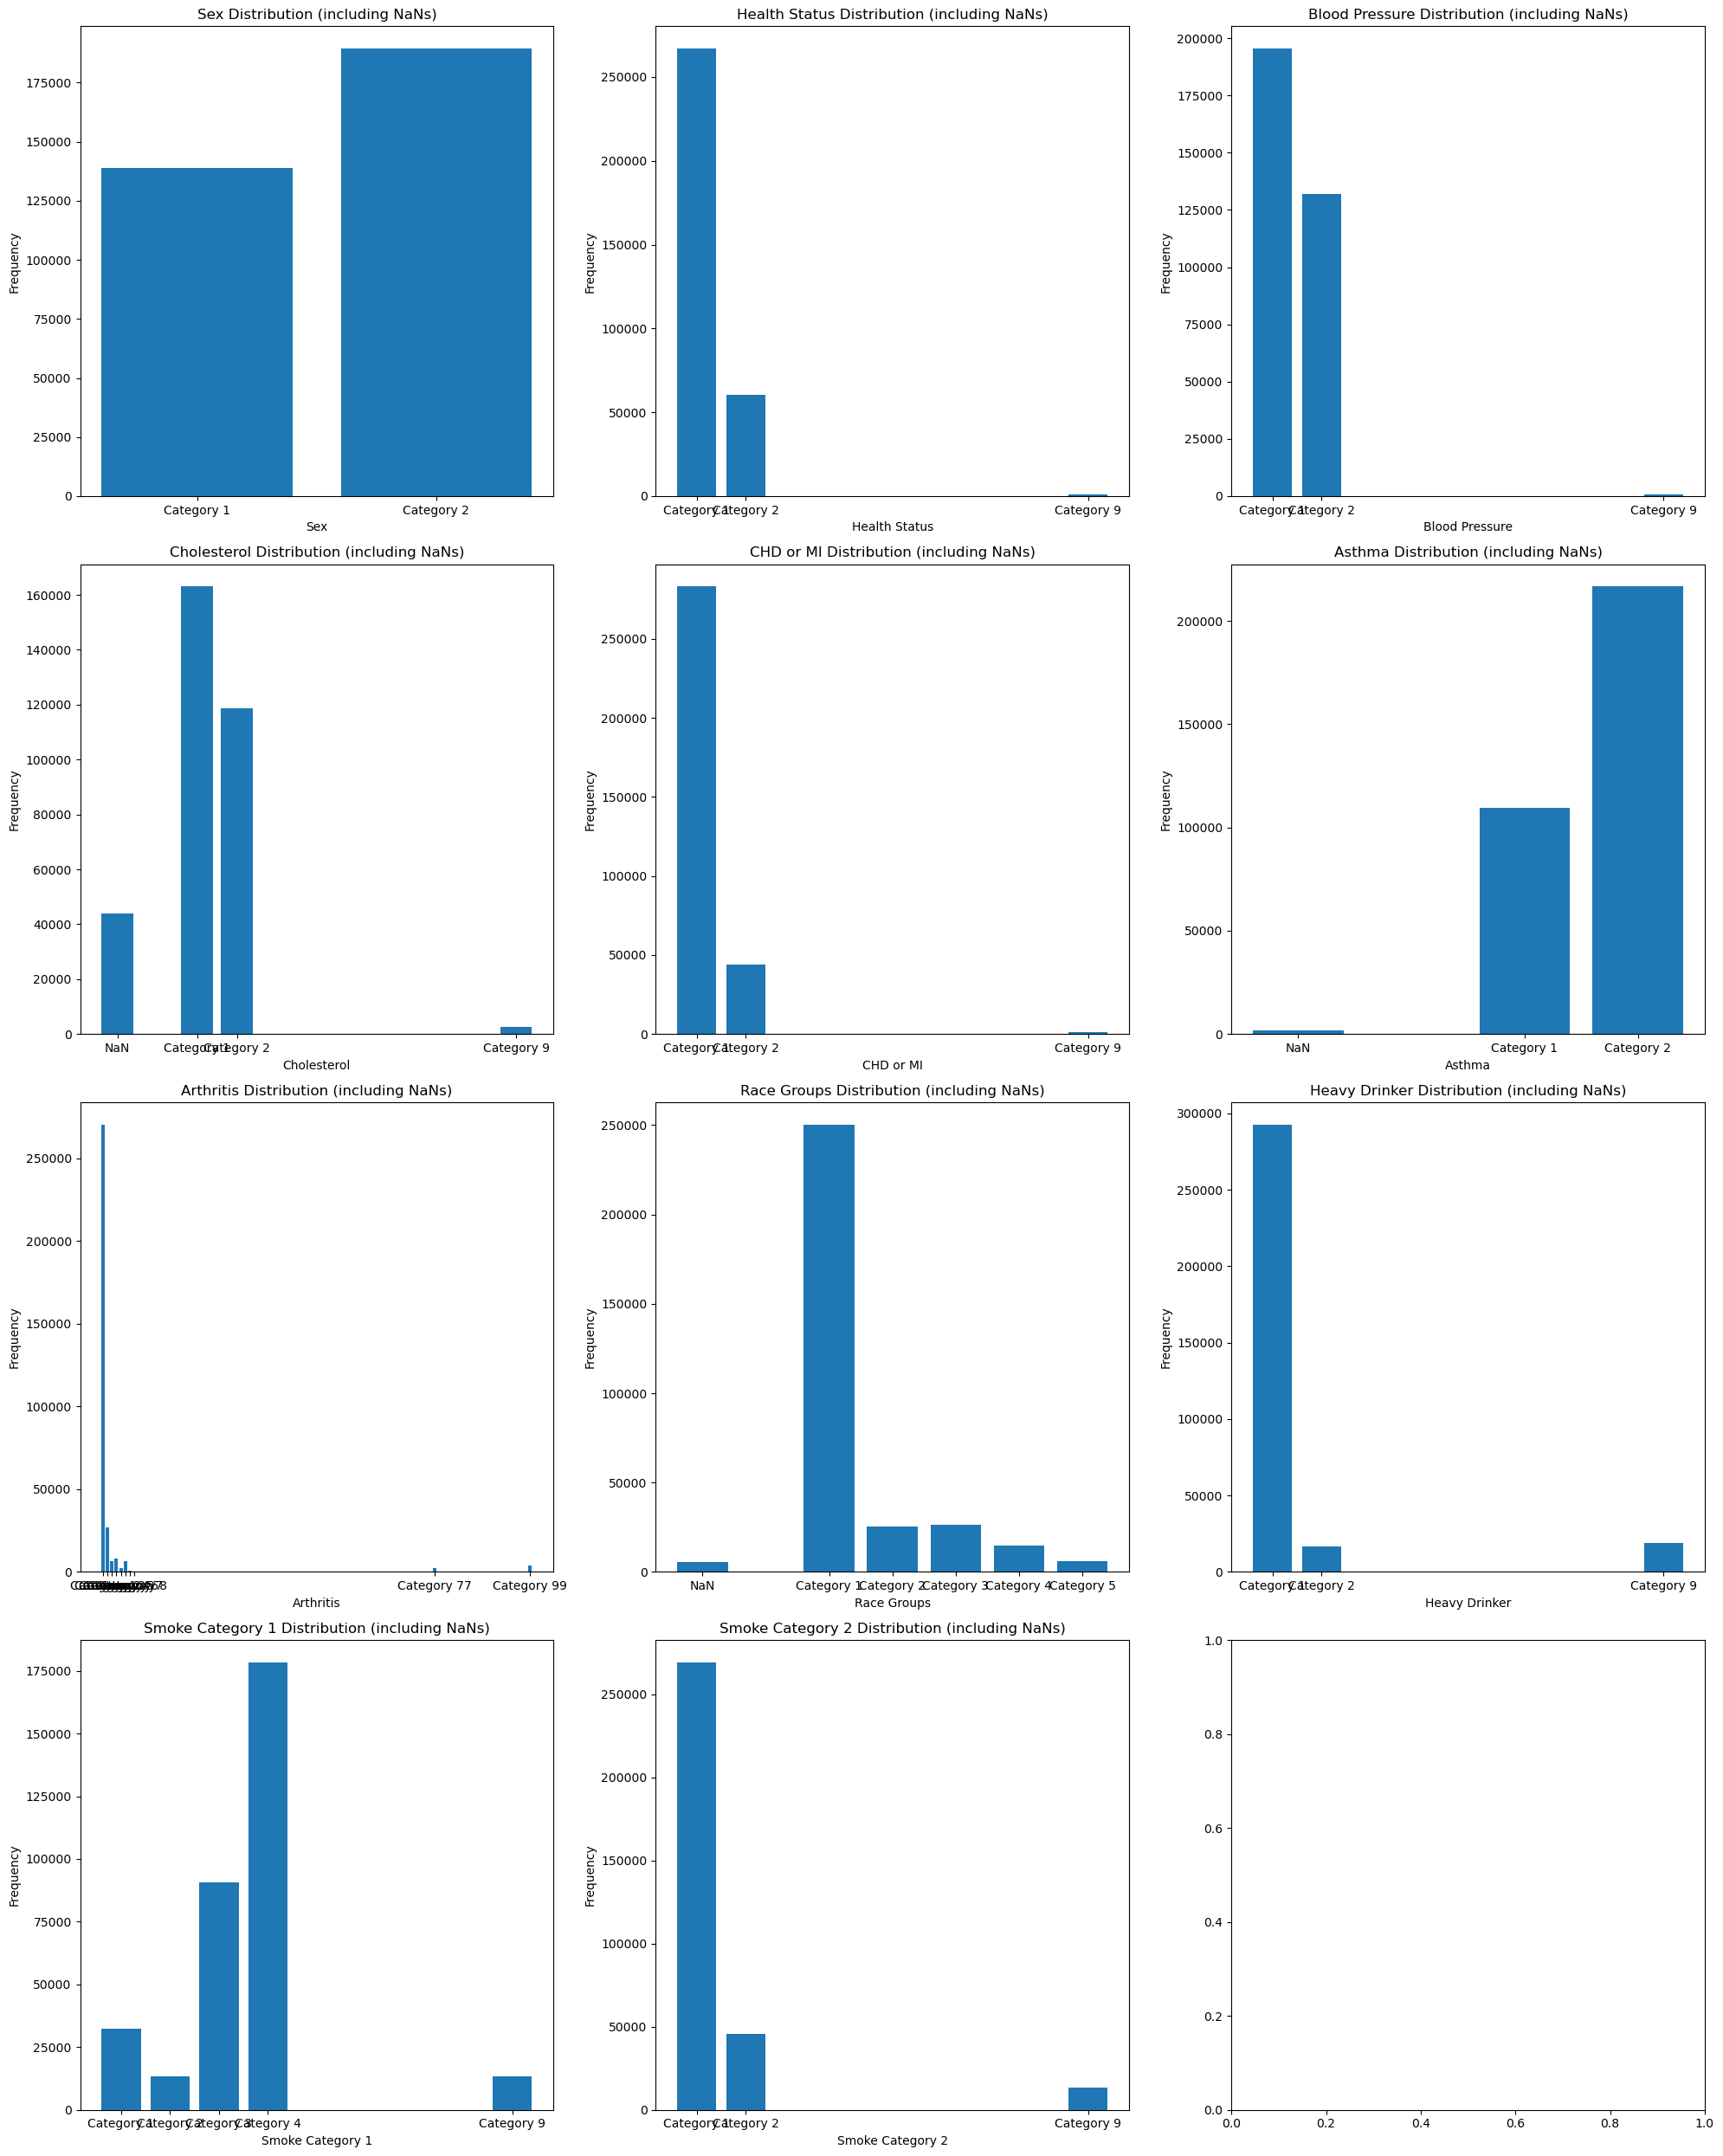

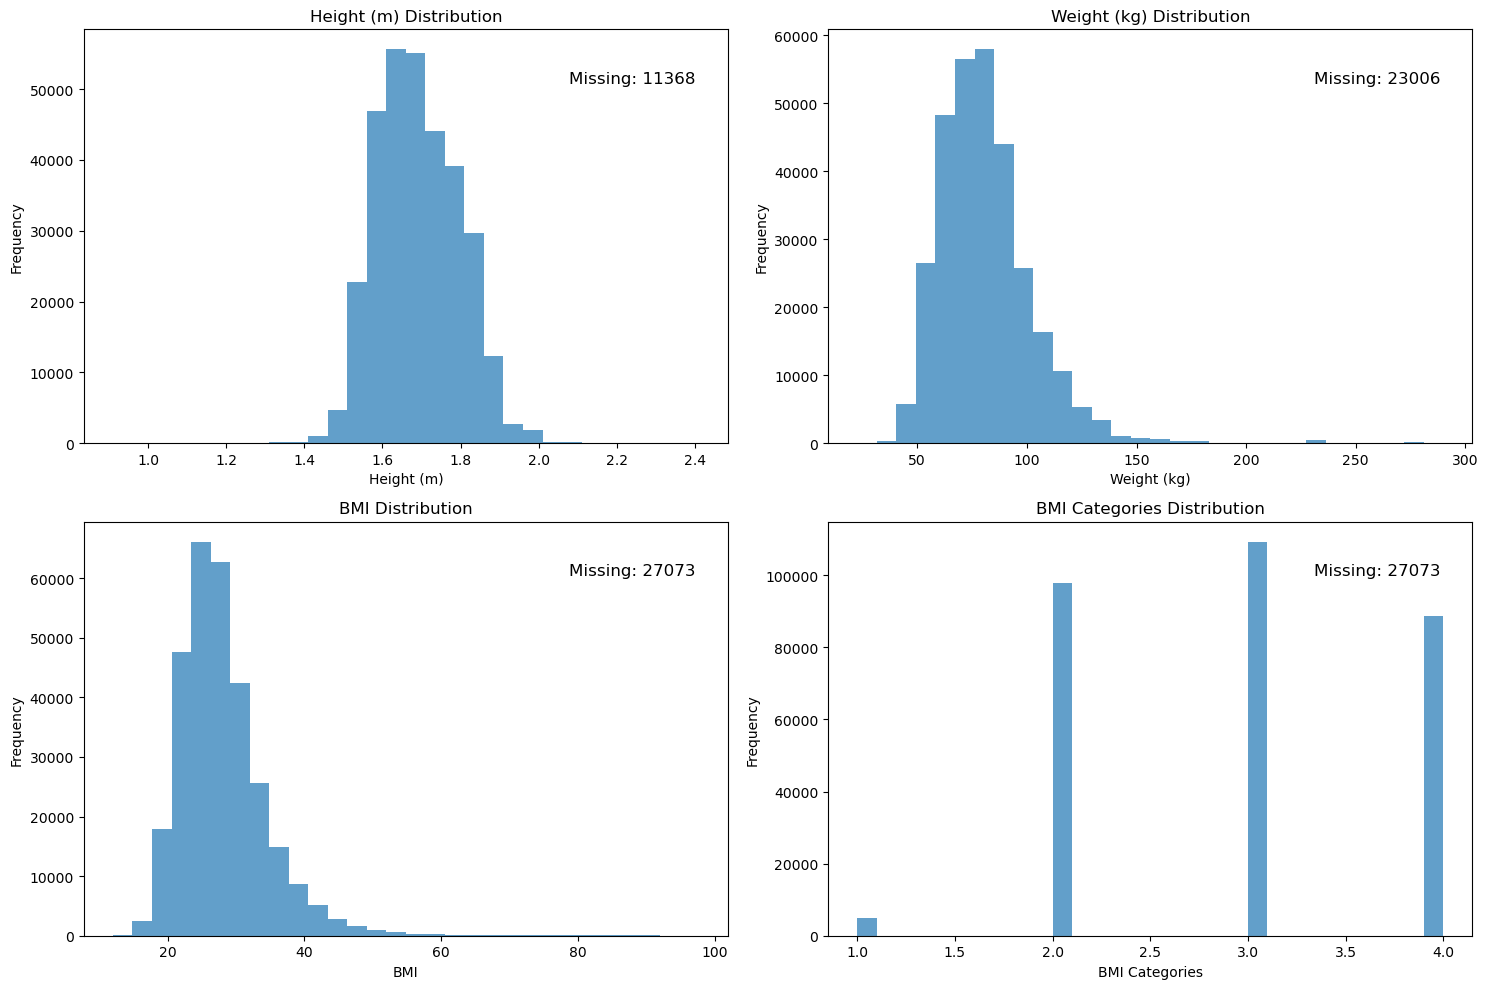

In [41]:
categorical_features = [0, 1, 2, 3, 4, 5, 6, 7, 19, 17, 18]  
numerical_features = [12, 13, 14, 15]  

#  all features that have missing values
features_with_nans = [3, 5, 7, 12, 13, 14, 15, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55]

# Dictionary to map feature index to feature name for clarity
feature_names = {
    0: "Sex", 1: "Health Status", 2: "Blood Pressure", 3: "Cholesterol", 4: "CHD or MI", 5: "Asthma",
    6: "Arthritis", 7: "Race Groups", 8: "Age Group 1", 9: "Age Group 2", 10: "Age Group 3", 11: "Age Group 4",
    12: "Height (m)", 13: "Weight (kg)", 14: "BMI", 15: "BMI Categories", 16: "BMI Categories",
    17: "Smoke Category 1", 18: "Smoke Category 2", 19: "Heavy Drinker",
    20: "Fruits Consumption", 21: "Vegetables Consumption", 22: "Other Consumption", 23: "Exercise Information", 41: "Exercise"
}

### Plotting Categorical Features
fig, axs = plt.subplots(4, 3, figsize=(20, 25))  
axs = axs.ravel()  # Flatten the axes array for easy iteration

# Plot bar plots for categorical features
for i, feature in enumerate(categorical_features):
    feature_data = x_train_final[:, feature]
    
    # Create a new array where NaN is treated as its own category (-1)
    feature_data_with_nan = np.where(np.isnan(feature_data), -1, feature_data)
    unique, counts = np.unique(feature_data_with_nan, return_counts=True)
    
    axs[i].bar(unique, counts)
    axs[i].set_title(f'{feature_names.get(feature, f"Feature {feature}")} Distribution (including NaNs)')
    axs[i].set_xlabel(f'{feature_names.get(feature, f"Feature {feature}")}')
    axs[i].set_ylabel('Frequency')
    axs[i].set_xticks(unique)
    axs[i].set_xticklabels([f'Category {int(u)}' if u != -1 else 'NaN' for u in unique])

plt.tight_layout()
plt.show()

### Plotting Numerical Features
fig, axs = plt.subplots(2, 2, figsize=(15, 10))  
axs = axs.ravel()

# Plot histograms for numerical features
for i, feature in enumerate(numerical_features):
    feature_data = x_train_final[:, feature]
    
    missing_count = np.isnan(feature_data).sum()
    
    # Plot histogram for non-missing data
    axs[i].hist(feature_data[~np.isnan(feature_data)], bins=30, alpha=0.7, label='Non-missing values')
    
    # Add annotation for missing values
    axs[i].text(0.95, 0.9, f'Missing: {missing_count}', transform=axs[i].transAxes, fontsize=12,
                verticalalignment='top', horizontalalignment='right')
    
    axs[i].set_title(f'{feature_names.get(feature, f"Feature {feature}")} Distribution')
    axs[i].set_xlabel(f'{feature_names.get(feature, f"Feature {feature}")}')
    axs[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [27]:
# compute the percentage of missing values for each column of x_train_final
missing_values = np.isnan(x_train_final).mean(axis=0)
missing_values_percentage = missing_values * 100
print(missing_values_percentage)

[ 0.          0.          0.         13.34846938  0.          0.57384918
  0.          1.65724473  0.          0.          0.          0.
  3.46442775  7.01113871  8.2505676   8.2505676   0.          0.
  0.          0.          8.64461274  8.20607372  8.95424139  8.50046475
  8.82502628  9.32329681  0.          0.          0.          0.
  9.7871303  11.46022216  0.          0.          0.          0.
  0.          0.          0.          0.          0.          9.90324104
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.57384918  0.57384918  0.57384918
  0.          0.        ]


Depending on the variable, we have more or less missing values; but all percentages are below 10% (except for 2 variables,both below 15%). In this case, it seems reasonable to impute the missing values. We will use the median for numerical variables and the mode for categorical variables.

In [44]:
# Replace missing values with the median for numerical features
for feature in numerical_features:
    feature_data = x_train_final[:, feature]
    median = np.nanmedian(feature_data)
    x_train_final[np.isnan(feature_data), feature] = median

# Replace missing values with the mode for categorical features
for feature in categorical_features:
    feature_data = x_train_final[:, feature]
    mode = np.nanmedian(feature_data)
    x_train_final[np.isnan(feature_data), feature] = mode

***Choosing the Features***   
Since there are several variables that measure the same thing for example 4 different variables for age (AGEG5YR,_AGE65YR,_AGE80,_AGE_G), we will do some exploratory data analysis to see which variables are the most relevant for our study. 

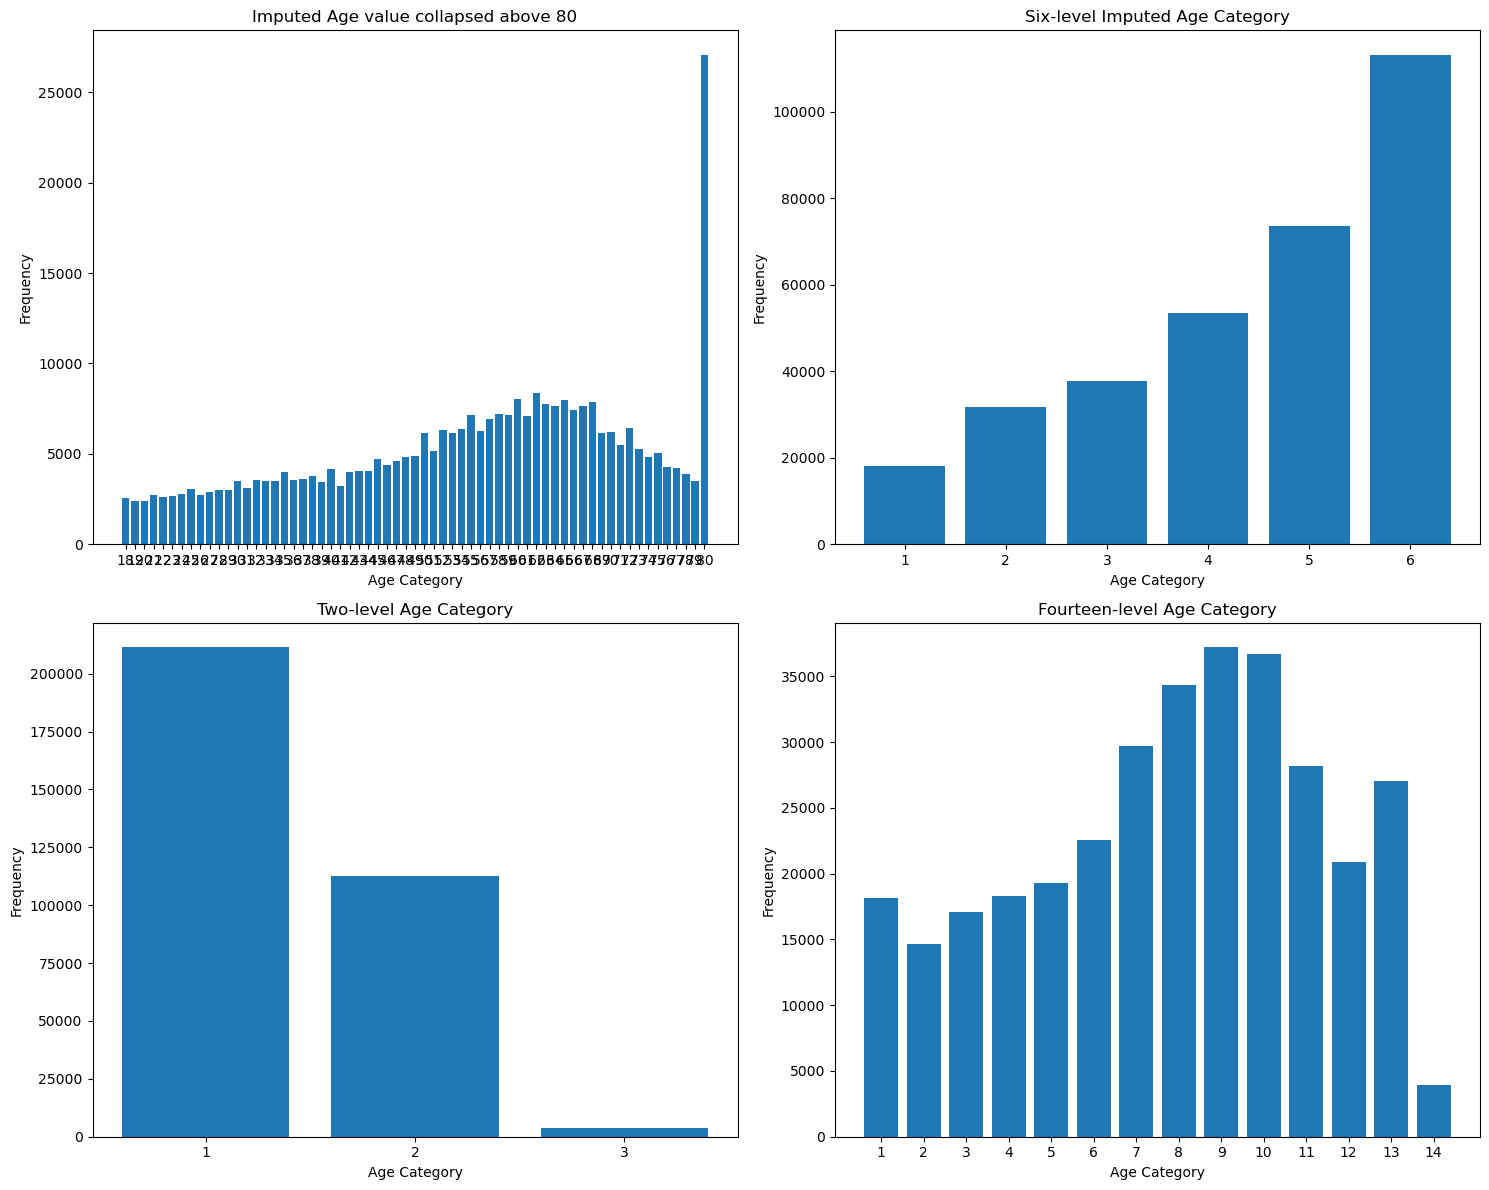

In [48]:
fourteen_level_age_col = 8  # Fourteen-level age category # Imputed Age value collapsed above 80
two_level_age_col = 9  # Two-level imputed age category
imputed_age_col = 10  # Imputed Age value collapsed above 80
six_level_age_col = 11  # six-level age category 

imputed_age = x_train_final[:, imputed_age_col]
six_level_age = x_train_final[:, six_level_age_col]
two_level_age = x_train_final[:, two_level_age_col]
fourteen_level_age = x_train_final[:, fourteen_level_age_col]

# subplots for each age variable
fig, axs = plt.subplots(2, 2, figsize=(15, 12)) 
axs = axs.ravel()

# Plot Imputed Age 
unique_imputed, counts_imputed = np.unique(imputed_age[~np.isnan(imputed_age)], return_counts=True)
axs[0].bar(unique_imputed, counts_imputed)
axs[0].set_title("Imputed Age value collapsed above 80")
axs[0].set_xlabel("Age Category")
axs[0].set_ylabel("Frequency")
axs[0].set_xticks(unique_imputed)

# Plot Six-level imputed age category
unique_six, counts_six = np.unique(six_level_age[~np.isnan(six_level_age)], return_counts=True)
axs[1].bar(unique_six, counts_six)
axs[1].set_title("Six-level Imputed Age Category")
axs[1].set_xlabel("Age Category")
axs[1].set_ylabel("Frequency")
axs[1].set_xticks(unique_six)

# Plot Two-level age category
unique_two, counts_two = np.unique(two_level_age[~np.isnan(two_level_age)], return_counts=True)
axs[2].bar(unique_two, counts_two)
axs[2].set_title("Two-level Age Category")
axs[2].set_xlabel("Age Category")
axs[2].set_ylabel("Frequency")
axs[2].set_xticks(unique_two)

# Plot Fourteen-level age category
unique_fourteen, counts_fourteen = np.unique(fourteen_level_age[~np.isnan(fourteen_level_age)], return_counts=True)
axs[3].bar(unique_fourteen, counts_fourteen)
axs[3].set_title("Fourteen-level Age Category")
axs[3].set_xlabel("Age Category")
axs[3].set_ylabel("Frequency")
axs[3].set_xticks(unique_fourteen)

plt.tight_layout()
plt.show()

- The two-level age variable is the least relevant, as it regroups too many different age groups together.
- The imputed age variable does not seem too relevant either, since the categorization is too broad.
- The other two groups of age variables seem to be the most relevant for our study. The six-level imputed age category spaces the age categories by only six years, making the last group too broad (putting together all individuals aged 65+).

Based on these observations concerning the age variables, we will only keep the fourteen-age level variable (_AGE_G).

In [49]:
columns_to_remove = [9, 10, 11]  # Indices of columns to remove
x_train_new = np.delete(x_train_new, columns_to_remove, axis=1)